In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
strokes = [
    [(3, 2), (1, 4)],
    [(2, 3), (5, 3)],
    [(1.5, 4.5), (4.5, 4.5)],
    [(4, 2), (3, 6)],
    [(1, 6), (6, 6)]
]

strokes

[[(3, 2), (1, 4)],
 [(2, 3), (5, 3)],
 [(1.5, 4.5), (4.5, 4.5)],
 [(4, 2), (3, 6)],
 [(1, 6), (6, 6)]]

In [13]:
img = np.zeros((512, 512), np.uint8)
img.shape

(512, 512)

In [4]:
512 / 8

64.0

In [5]:
scaled_strokes = np.array(strokes, dtype=np.uint8)
scaled_strokes.shape

(5, 2, 2)

In [6]:
scaled_strokes = scaled_strokes * 64

In [7]:
scaled_strokes.shape

(5, 2, 2)

In [8]:
scaled_strokes.dtype

dtype('uint8')

In [9]:
scaled_strokes

array([[[192, 128],
        [ 64,   0]],

       [[128, 192],
        [ 64, 192]],

       [[ 64,   0],
        [  0,   0]],

       [[  0, 128],
        [192, 128]],

       [[ 64, 128],
        [128, 128]]], dtype=uint8)

In [14]:
for pair_points in strokes:
    p1 = pair_points[0]
    p2 = pair_points[1]
    # print(p1, p2)
    x1 = int(p1[0] * 64)
    y1 = int(p1[1] * 64)
    x2 = int(p2[0] * 64)
    y2 = int(p2[1] * 64)
    cv2.line(img, (x1, y1), (x2, y2), (255,), 10)

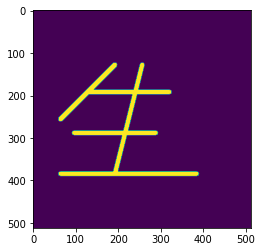

In [15]:
plt.imshow(img)

In [19]:
min_x = 9999
max_x = 0
min_y = 9999
max_y = 0

In [18]:
RenderedImageWidth = 64
RenderedImageHeight = 64
RenderedImagePaddingRatio = 0.125
RenderedStrokeWidthRatio = 0.0625

In [24]:
offset_left = RenderedImageWidth * RenderedImagePaddingRatio
offset_top = RenderedImageHeight * RenderedImagePaddingRatio
offset_left, offset_top

(8.0, 8.0)

In [25]:
render_width = RenderedImageWidth - (2 * offset_left)
render_height = RenderedImageHeight - (2 * offset_top)
render_width, render_height

(48.0, 48.0)

In [20]:
for stroke in strokes:
    for point in stroke:
        x = point[0]
        y = point[1]
        min_x = min(min_x, x)
        max_x = max(max_x, x)
        min_y = min(min_y, y)
        max_y = max(max_y, y)

In [21]:
min_x, max_x

(1, 6)

In [22]:
min_y, max_y

(2, 6)

In [23]:
char_width = max_x - min_x
char_height = max_y - min_y
char_width, char_height

(5, 4)

In [26]:
scale_ratio_x = render_width / char_width
scale_ratio_y = render_height / char_height
scale_ratio_x, scale_ratio_y

(9.6, 12.0)

In [27]:
scale_ratio = min(scale_ratio_x, scale_ratio_y)
scale_ratio

9.6

In [28]:
centering_offset_x = offset_left + ((render_width - (char_width * scale_ratio)) / 2)
centering_offset_y = offset_top + ((render_height - (char_height * scale_ratio)) / 2)
centering_offset_x, centering_offset_y

(8.0, 12.8)

In [31]:
scaled_strokes = []

for stroke in strokes:
    scaled_points = []
    scaled_strokes.append(scaled_points)
    for point in stroke:
        x = point[0]
        y = point[1]
        scaled_x = centering_offset_x + ((x - min_x) * scale_ratio)
        scaled_y = centering_offset_y + ((y - min_y) * scale_ratio)
        
        scaled_points.append((scaled_x, scaled_y))

In [32]:
scaled_strokes

[[(27.2, 12.8), (8.0, 32.0)],
 [(17.6, 22.4), (46.4, 22.4)],
 [(12.8, 36.8), (41.6, 36.8)],
 [(36.8, 12.8), (27.2, 51.2)],
 [(8.0, 51.2), (56.0, 51.2)]]

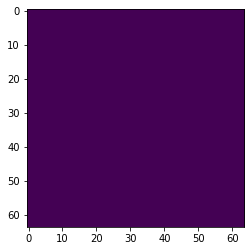

In [34]:
render_img = np.zeros((RenderedImageHeight, RenderedImageWidth), dtype=np.uint8)
plt.imshow(render_img)

In [33]:
round(1.5)

2

In [35]:
stroke_width = round(RenderedImageWidth * RenderedStrokeWidthRatio)
stroke_width

4

In [36]:
for stroke in scaled_strokes:
    p1 = stroke[0]
    p2 = stroke[1]
    x1 = round(p1[0])
    y1 = round(p1[1])
    x2 = round(p2[0])
    y2 = round(p2[1])
    cv2.line(render_img, (x1, y1), (x2, y2), (255,), stroke_width)

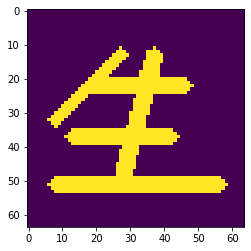

In [37]:
plt.imshow(render_img)